In [1]:
options(warn=-1)

In [2]:
library(dplyr)
library(ggplot2)
library(scales)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



---
#### outcome distribution

In [3]:
dist_data <- read.csv('data/voteup-thank-favotite_dist.csv')

In [4]:
head(dist_data)

index,cnt,frac,type
<int>,<int>,<dbl>,<fct>
0,161337,0.68702573,voteupCount
1,10867,0.04627524,voteupCount
2,6252,0.02662306,voteupCount
3,4347,0.01851095,voteupCount
4,3137,0.01335837,voteupCount
5,2443,0.01040309,voteupCount


In [5]:
options(repr.plot.width = 3, repr.plot.height = 3)

xlimits = c(1e0, 1e6)
ylimits = c(1e-6, 1e-1)


# dist_data %>%
#   filter(index>0) %>%
#   # filter(type=='voteupCount') %>%
#   # select(log_in_degree, log_voteup_cnt) %>%
#   ggplot(aes(x=index, y=frac, color=type)) +
#   geom_point(aes(shape=type), alpha=.5, size=2) +
#   scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
#                 limits=xlimits,
#                 labels = scales::trans_format("log10", scales::math_format(10^.x))) +
#   scale_y_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
#                 limits=ylimits,
#                 labels = scales::trans_format("log10", scales::math_format(10^.x))) +
#   scale_colour_manual(values=c('#ef3b2c', '#386cb0', '#984ea3')) +
#   scale_shape_manual(values=c(15,16,17)) +
#   theme_classic() +
#   theme(legend.position=c(0.8, 0.8))

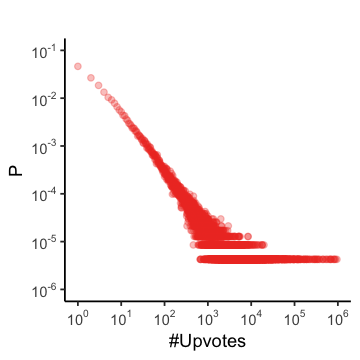

In [6]:
# voteupCount
dist_data %>%
  filter(index>0) %>%
  filter(type=='voteupCount') %>%
  # select(log_in_degree, log_voteup_cnt) %>%
  ggplot(aes(x=index, y=frac)) +
  geom_point(alpha=.3, size=1.5, shape=21, , fill='#ef3b2c', color='#ef3b2c') +
  scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                limits=xlimits,
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  scale_y_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                limits=ylimits,
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  theme_classic() +
  labs(title="",x="#Upvotes", y = "P")

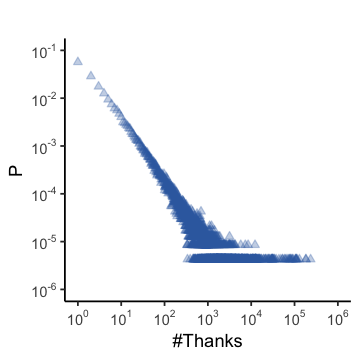

In [7]:
# thankedCount

dist_data %>%
  filter(index>0) %>%
  filter(type=='thankedCount') %>%
  # select(log_in_degree, log_voteup_cnt) %>%
  ggplot(aes(x=index, y=frac)) +
  geom_point(alpha=.3, size=1.5, shape=24, fill='#386cb0', color='#386cb0') +
  scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                limits=xlimits,
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  scale_y_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                limits=ylimits,
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  theme_classic() +
  labs(title="",x="#Thanks", y = "P")

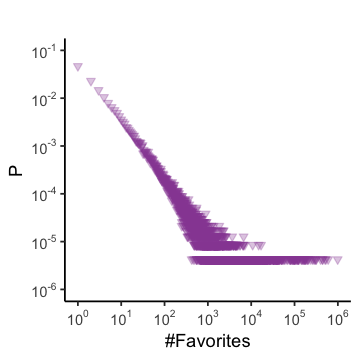

In [8]:
# favoritedCount

dist_data %>%
  filter(index>0) %>%
  filter(type=='favoritedCount') %>%
  # select(log_in_degree, log_voteup_cnt) %>%
  ggplot(aes(x=index, y=frac)) +
  geom_point(alpha=.3, size=1.5, shape=25, fill='#984ea3', color='#984ea3') +
  scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                limits=xlimits,
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  scale_y_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
                limits=ylimits,
                labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  theme_classic() +
  labs(title="",x="#Favorites", y = "P")

---
#### social reputation index vs weak and strong diversity measures

*social reputation as a function of weak diversity, stratified by indegree*

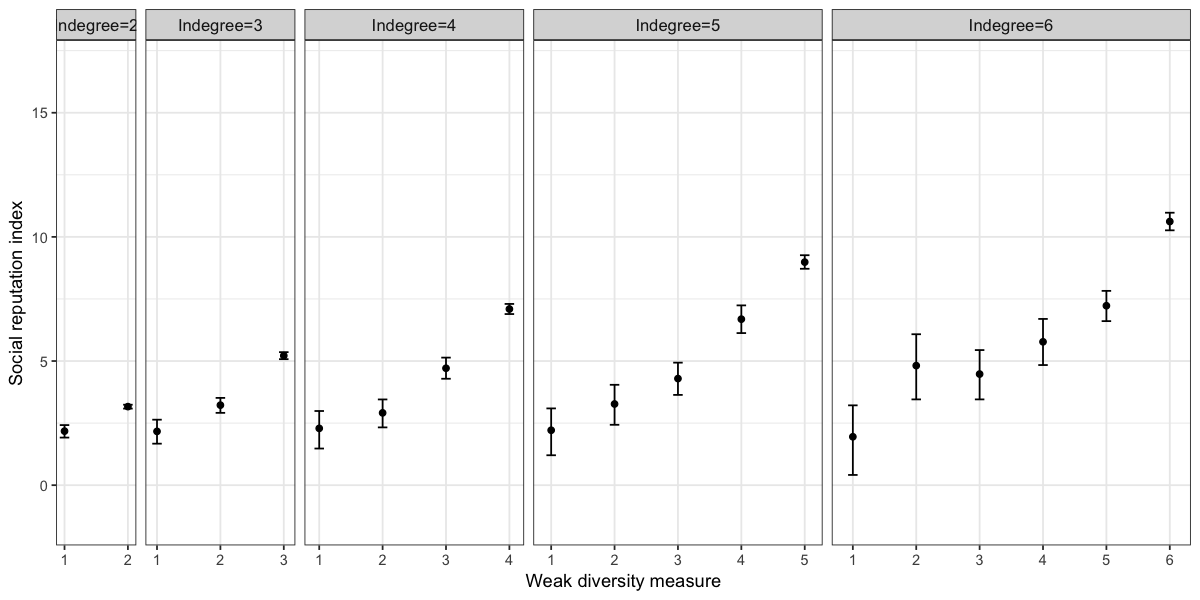

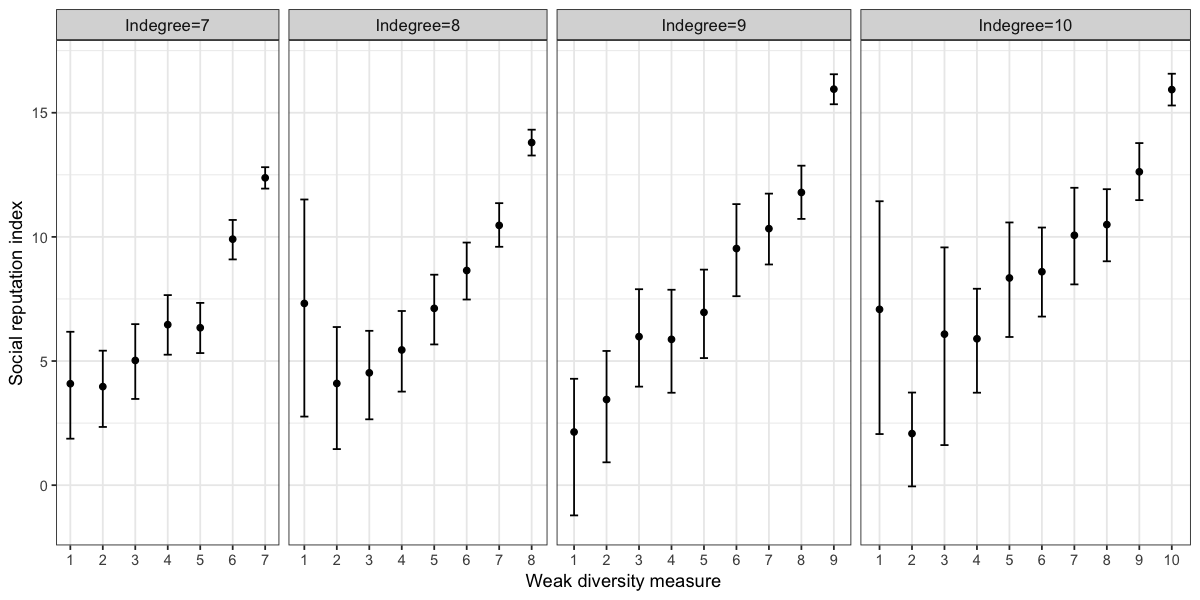

In [9]:
data <- read.csv('data/indegree_weak_SD.csv')


options(repr.plot.width = 10, repr.plot.height = 5)

levels_ <- c("Indegree=2", "Indegree=3", "Indegree=4", "Indegree=5", "Indegree=6")
data %>%
  filter(in_degree %in% c(2,3,4,5,6)) %>%
  mutate(group=paste0("Indegree=", in_degree)) %>%
  mutate(group=factor(group, levels=levels_)) %>%
  ggplot(aes(x=weak_SD, y=mean)) +
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper), size=0.5, width=.15) +
    geom_point(size=1.5, color='black') +
    scale_x_continuous(breaks=seq(1, 10, 1)) +
    scale_y_continuous(breaks=seq(-5, 20, 5), limits=c(-1.5, 17)) +
    xlab("Weak diversity measure") + ylab("Social reputation index") +
    facet_grid(cols=vars(group), scales='free_x', space='free_x') +
    theme_bw() +
    theme(panel.grid.minor.x = element_blank(),
         strip.text.x = element_text(size=10), )



options(repr.plot.width = 10, repr.plot.height = 5)
levels_ <- c("Indegree=7", "Indegree=8", "Indegree=9", "Indegree=10")
data %>%
  filter(in_degree %in% c(7,8,9,10)) %>%
  mutate(group=paste0("Indegree=", in_degree)) %>%
  mutate(group=factor(group, levels=levels_)) %>%
  ggplot(aes(x=weak_SD, y=mean)) +
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper), size=0.5, width=.25) +
    geom_point(size=1.5, color='black') +
    scale_x_continuous(breaks=seq(1, 10, 1)) +
    scale_y_continuous(breaks=seq(-5, 20, 5), limits=c(-1.5, 17)) +
    xlab("Weak diversity measure") + ylab("Social reputation index") +
    facet_grid(cols=vars(group), scales='free_x', space='free_x') +
    theme_bw() +
    theme(panel.grid.minor.x = element_blank(),
         strip.text.x = element_text(size=10), )

*social reputation as a function of strong diversity, stratified by indegree*

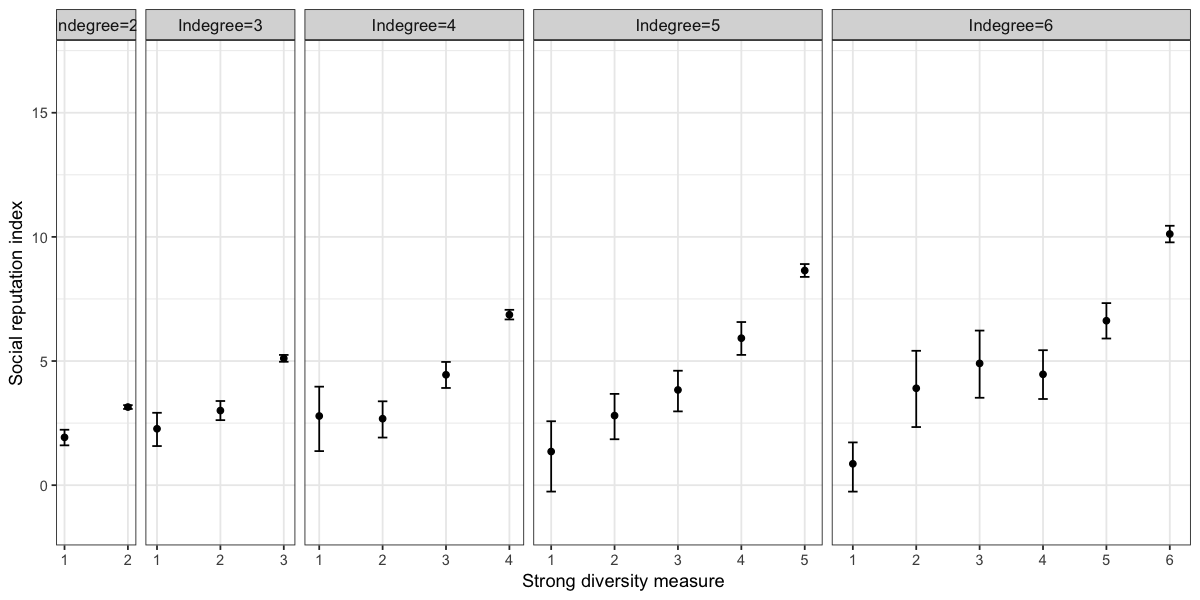

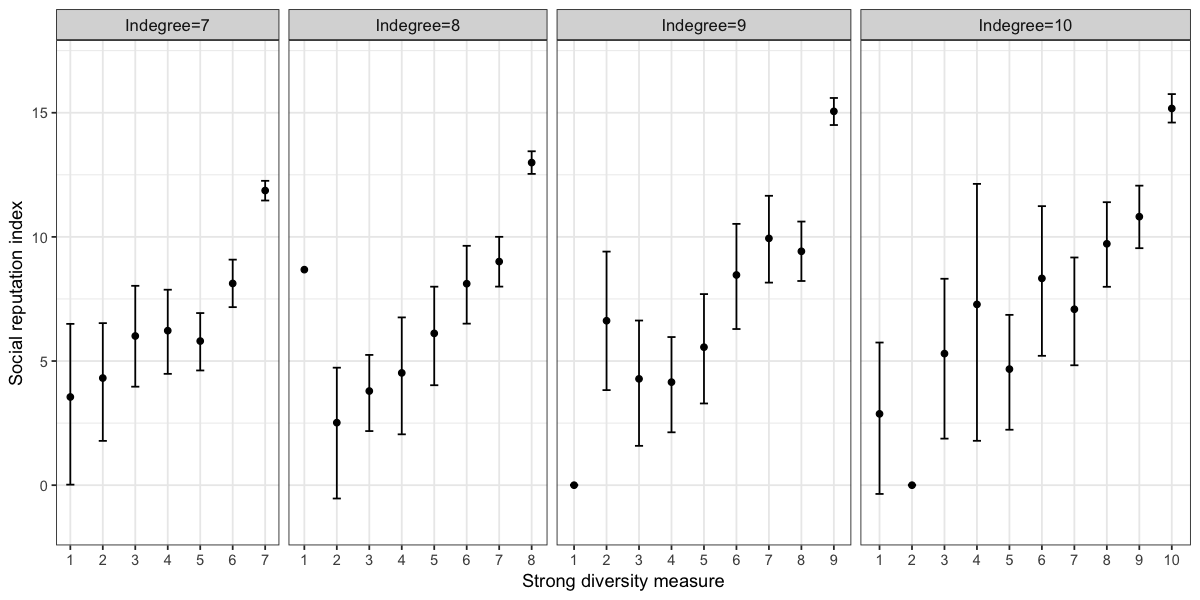

In [10]:
data <- read.csv('data/indegree_strong_SD.csv')


options(repr.plot.width = 10, repr.plot.height = 5)
levels_ <- c("Indegree=2", "Indegree=3", "Indegree=4", "Indegree=5", "Indegree=6")
data %>%
  filter(in_degree %in% c(2,3,4,5,6)) %>%
  mutate(group=paste0("Indegree=", in_degree)) %>%
  mutate(group=factor(group, levels=levels_)) %>%
  ggplot(aes(x=strong_SD, y=mean)) +
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper), size=0.5, width=.15) +
    geom_point(size=1.5, color='black') +
    scale_x_continuous(breaks=seq(1, 10, 1)) +
    scale_y_continuous(breaks=seq(-5, 20, 5), limits=c(-1.5, 17)) +
    xlab("Strong diversity measure") + ylab("Social reputation index") +
    facet_grid(cols=vars(group), scales='free_x', space='free_x') +
    theme_bw() +
    theme(panel.grid.minor.x = element_blank(),
         strip.text.x = element_text(size=10), )


options(repr.plot.width = 10, repr.plot.height = 5)
levels_ <- c("Indegree=7", "Indegree=8", "Indegree=9", "Indegree=10")
data %>%
  filter(in_degree %in% c(7,8,9,10)) %>%
  mutate(group=paste0("Indegree=", in_degree)) %>%
  mutate(group=factor(group, levels=levels_)) %>%
  ggplot(aes(x=strong_SD, y=mean)) +
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper), size=0.5, width=.25) +
    geom_point(size=1.5, color='black') +
    scale_x_continuous(breaks=seq(1, 10, 1)) +
    scale_y_continuous(breaks=seq(-5, 20, 5), limits=c(-1.5, 17)) +
    xlab("Strong diversity measure") + ylab("Social reputation index") +
    facet_grid(cols=vars(group), scales='free_x', space='free_x') +
    theme_bw() +
    theme(panel.grid.minor.x = element_blank(),
         strip.text.x = element_text(size=10), )

---
#### Regression analyses of weak and strong diversity measures

*univariate/separate regressions*

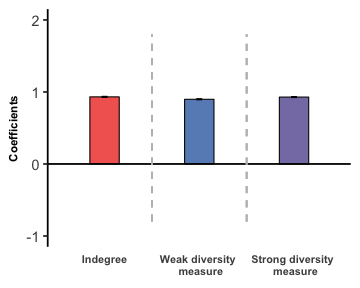

In [11]:
data <- read.csv('data/regression_singles.csv')

options(repr.plot.width = 3, repr.plot.height = 2.4)


data %>%
  filter(!index %in% c('Intercept')) %>%
  filter(index %in% c("log_in_degree", "log_weak_SD", "log_strong_SD")) %>%
  mutate(index = factor(index, levels = c("log_in_degree", "log_weak_SD", "log_strong_SD"))) %>%
  ggplot(aes(x=index, y=coeff, fill=iv)) +
    geom_bar(position=position_dodge(), stat="identity",
             colour="black", # Use black outlines,
             alpha=.8,
             size=.3, width=.31) +      # Thinner lines
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper),
                  # size=.8, width=.05,
                  size=.5, width=.06,
                  position=position_dodge(.9)) +
    # xlab('Diversity') +
    ylab('Coefficients') +
    scale_x_discrete(labels=c('Indegree', 'Weak diversity \n measure', 'Strong diversity \n measure')) +
    scale_y_continuous(limits=c(-1,2)) +
    # scale_fill_manual(values = c('#ef3b2c', '#7fc97f', '#386cb0')) +
    scale_fill_manual(values = c('#ef3b2c', '#63589f', '#386cb0')) + 
    theme_classic() +
    theme(
         legend.position="none",
         plot.background = element_blank(), 

         axis.ticks.x = element_blank(),
         axis.title.x=element_blank(),
#          axis.text.x=element_blank(),
         axis.text.x=element_text(size=6.5, face="bold"),

         axis.title.y=element_text(size=7, face="bold"),
#          # axis.text.y=element_blank(),

         axis.line.x = element_blank(),
#          axis.line.y = element_line(color="black", size=.7),
         )+
    geom_hline(yintercept=0, size=.5) +
    geom_segment(aes(x = 1.5, y = -.8, xend = 1.5, yend = 1.8), linetype = "dashed", color='grey') +
    geom_segment(aes(x = 2.5, y = -.8, xend = 2.5, yend = 1.8), linetype = "dashed", color='grey')



*combined regressions*

In [12]:
data <- read.csv('data/regression_combined.csv')

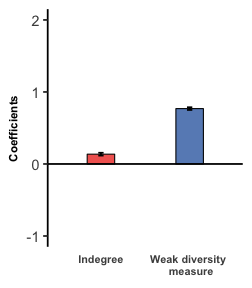

In [13]:
options(repr.plot.width = 2.1, repr.plot.height = 2.4)

data %>%
  filter(!index %in% c('Intercept')) %>%
  filter(ivs %in% c('log_in_degree+log_weak_SD')) %>%
  mutate(index = factor(index, levels = c("log_in_degree", "log_weak_SD", "log_strong_SD"))) %>%
  ggplot(aes(x=index, y=coeff, fill=index)) +
    geom_bar(position=position_dodge(), stat="identity",
             colour="black", # Use black outlines,
             alpha=0.8,
             size=.3, width=.31) +      # Thinner lines
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper),
                  size=.5, width=.06,
                  position=position_dodge(.9)) +
    # xlab('Diversity') +
    ylab('Coefficients') +
    scale_x_discrete(labels=c('Indegree', 'Weak diversity \n measure', 'Strong diversity \n measure')) +
    scale_y_continuous(limits=c(-1,2)) +
    # scale_fill_manual(values = c('#ef3b2c', '#386cb0', '#7fc97f')) +
    scale_fill_manual(values = c('#ef3b2c', '#386cb0')) +
    # scale_fill_manual(values = c('#ef3b2c', '#63589f')) +
    # scale_fill_manual(values = c('#386cb0', '#63589f')) +
    # scale_fill_manual(values = c('#ef3b2c', '#91D1C2B2')) +
    # scale_fill_manual(values = c('#ef3b2c', '#7bbcb0')) +
#     scale_fill_manual(values = c('#ef3b2c', '#386cb0', '#63589f')) +
    theme_classic() +
    theme(
         legend.position="none",
         plot.background = element_blank(), 

         axis.ticks.x = element_blank(),
         axis.title.x=element_blank(),
#          axis.text.x=element_blank(),
         axis.text.x=element_text(size=6.5, face="bold"),

         axis.title.y=element_text(size=7, face="bold"),
#          # axis.text.y=element_blank(),

         axis.line.x = element_blank(),
#          axis.line.y = element_line(color="black", size=.7),
         )+
    geom_hline(yintercept=0, size=.5)

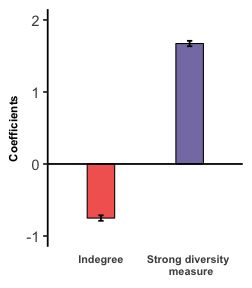

In [14]:
options(repr.plot.width = 2.1, repr.plot.height = 2.4)

data %>%
  filter(!index %in% c('Intercept')) %>%
  filter(ivs %in% c('log_in_degree+log_strong_SD')) %>%
  mutate(index = factor(index, levels = c("log_in_degree", "log_weak_SD", "log_strong_SD"))) %>%
  ggplot(aes(x=index, y=coeff, fill=index)) +
    geom_bar(position=position_dodge(), stat="identity",
             colour="black", # Use black outlines,
             alpha=0.8,
             size=.3, width=.31) +      # Thinner lines
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper),
                  size=.5, width=.06,
                  position=position_dodge(.9)) +
    # xlab('Diversity') +
    ylab('Coefficients') +
    scale_x_discrete(labels=c('Indegree', 'Strong diversity \n measure')) +
    scale_y_continuous(limits=c(-1,2)) +
    # scale_fill_manual(values = c('#ef3b2c', '#386cb0', '#7fc97f')) +
    scale_fill_manual(values = c('#ef3b2c', '#63589f')) +
    # scale_fill_manual(values = c('#386cb0', '#63589f')) +
    # scale_fill_manual(values = c('#ef3b2c', '#91D1C2B2')) +
    # scale_fill_manual(values = c('#ef3b2c', '#7bbcb0')) +
#     scale_fill_manual(values = c('#ef3b2c', '#386cb0', '#63589f')) +
    theme_classic() +
    theme(
         legend.position="none",
         plot.background = element_blank(), 

         axis.ticks.x = element_blank(),
         axis.title.x=element_blank(),
#          axis.text.x=element_blank(),
         axis.text.x=element_text(size=6.5, face="bold"),

         axis.title.y=element_text(size=7, face="bold"),
#          # axis.text.y=element_blank(),

         axis.line.x = element_blank(),
#          axis.line.y = element_line(color="black", size=.7),
         )+
    geom_hline(yintercept=0, size=.5)

---
#### Regression analyses: advantages of k-clip diversity measure over indegree, weak and strong diversity measures

*combined regressions for comparison*

In [15]:
data <- read.csv('data/kclip_SD_regression.csv')

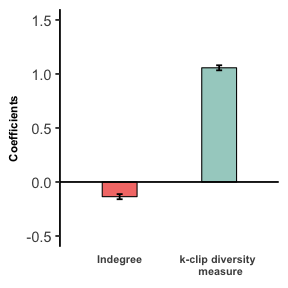

In [16]:
options(repr.plot.width = 2.4, repr.plot.height = 2.4)


data %>%
  filter(!index %in% c('Intercept')) %>%
  filter(ivs %in% c('log_in_degree+log_sd_kclip_5')) %>%
  # filter(ivs %in% c('log_weak_SD+log_sd_kclip_5')) %>%
#   filter(ivs %in% c('log_strong_SD+log_sd_kclip_5')) %>%
  # filter(ivs %in% c('log_sd_kclip_5+log_kclip_5_weak_SB_f20')) %>%
  mutate(index = factor(index, levels = c("log_in_degree", "log_weak_SD", 
        "log_strong_SD", "log_sd_kclip_5"))) %>%
  ggplot(aes(x=index, y=coeff, fill=index)) +
    geom_bar(position=position_dodge(), stat="identity",
             colour="black", # Use black outlines,
             alpha=0.7,
             size=.3, width=.35) +      # Thinner lines
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper),
                  # position=position_dodge(.9),
                  size=.5, width=.06) +
    # xlab('Diversity') +
    ylab('Coefficients') +
    scale_x_discrete(labels=c('Indegree', 'k-clip diversity \n measure')) +
    scale_y_continuous(breaks=seq(-2,3,.5), limits=c(-.5, 1.5)) +
    # scale_fill_manual(values = c('#ef3b2c', '#386cb0', '#7fc97f')) +
    scale_fill_manual(values = c('#ef3b2c', '#7bbcb0')) +
    # scale_fill_manual(values = c('#386cb0', '#7bbcb0')) +
#     scale_fill_manual(values = c('#63589f', '#7bbcb0')) +
    # scale_fill_manual(values = c('#7bbcb0', '#fdb462')) +
    theme_classic() +
    theme(
         legend.position="none",
         plot.background = element_blank(), 

         axis.ticks.x = element_blank(),
         axis.title.x=element_blank(),
#          axis.text.x=element_blank(),
         axis.text.x=element_text(size=6.5, face="bold"),

         axis.title.y=element_text(size=7, face="bold"),
#          # axis.text.y=element_blank(),

         axis.line.x = element_blank(),
#          axis.line.y = element_line(color="black", size=.7),
         )+
    geom_hline(yintercept=0, size=.5)

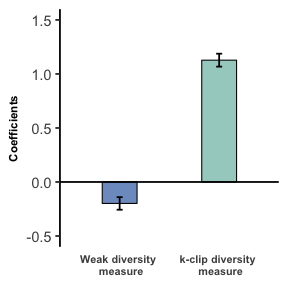

In [17]:
options(repr.plot.width = 2.4, repr.plot.height = 2.4)

data %>%
  filter(!index %in% c('Intercept')) %>%
#   filter(ivs %in% c('log_in_degree+log_sd_kclip_5')) %>%
  filter(ivs %in% c('log_weak_SD+log_sd_kclip_5')) %>%
#   filter(ivs %in% c('log_strong_SD+log_sd_kclip_5')) %>%
  # filter(ivs %in% c('log_sd_kclip_5+log_kclip_5_weak_SB_f20')) %>%
  mutate(index = factor(index, levels = c("log_in_degree", "log_weak_SD", 
        "log_strong_SD", "log_sd_kclip_5"))) %>%
  ggplot(aes(x=index, y=coeff, fill=index)) +
    geom_bar(position=position_dodge(), stat="identity",
             colour="black", # Use black outlines,
             alpha=0.7,
             size=.3, width=.35) +      # Thinner lines
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper),
                  # position=position_dodge(.9),
                  size=.5, width=.06) +
    # xlab('Diversity') +
    ylab('Coefficients') +
    scale_x_discrete(labels=c('Weak diversity \n measure', 'k-clip diversity \n measure')) +
    scale_y_continuous(breaks=seq(-2,3,.5), limits=c(-.5, 1.5)) +
    # scale_fill_manual(values = c('#ef3b2c', '#386cb0', '#7fc97f')) +
#     scale_fill_manual(values = c('#ef3b2c', '#7bbcb0')) +
    scale_fill_manual(values = c('#386cb0', '#7bbcb0')) +
#     scale_fill_manual(values = c('#63589f', '#7bbcb0')) +
    # scale_fill_manual(values = c('#7bbcb0', '#fdb462')) +
    theme_classic() +
    theme(
         legend.position="none",
         plot.background = element_blank(), 

         axis.ticks.x = element_blank(),
         axis.title.x=element_blank(),
#          axis.text.x=element_blank(),
         axis.text.x=element_text(size=6.5, face="bold"),

         axis.title.y=element_text(size=7, face="bold"),
#          # axis.text.y=element_blank(),

         axis.line.x = element_blank(),
#          axis.line.y = element_line(color="black", size=.7),
         )+
    geom_hline(yintercept=0, size=.5)

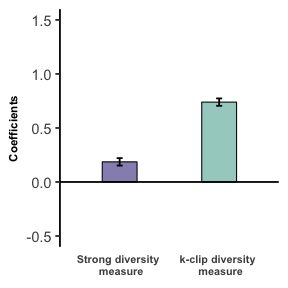

In [18]:
options(repr.plot.width = 2.4, repr.plot.height = 2.4)

data %>%
  filter(!index %in% c('Intercept')) %>%
#   filter(ivs %in% c('log_in_degree+log_sd_kclip_5')) %>%
#   filter(ivs %in% c('log_weak_SD+log_sd_kclip_5')) %>%
  filter(ivs %in% c('log_strong_SD+log_sd_kclip_5')) %>%
  # filter(ivs %in% c('log_sd_kclip_5+log_kclip_5_weak_SB_f20')) %>%
  mutate(index = factor(index, levels = c("log_in_degree", "log_weak_SD", 
        "log_strong_SD", "log_sd_kclip_5"))) %>%
  ggplot(aes(x=index, y=coeff, fill=index)) +
    geom_bar(position=position_dodge(), stat="identity",
             colour="black", # Use black outlines,
             alpha=0.7,
             size=.3, width=.35) +      # Thinner lines
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper),
                  # position=position_dodge(.9),
                  size=.5, width=.06) +
    # xlab('Diversity') +
    ylab('Coefficients') +
    scale_x_discrete(labels=c('Strong diversity \n measure', 'k-clip diversity \n measure')) +
    scale_y_continuous(breaks=seq(-2,3,.5), limits=c(-.5, 1.5)) +
    # scale_fill_manual(values = c('#ef3b2c', '#386cb0', '#7fc97f')) +
#     scale_fill_manual(values = c('#ef3b2c', '#7bbcb0')) +
#     scale_fill_manual(values = c('#386cb0', '#7bbcb0')) +
    scale_fill_manual(values = c('#63589f', '#7bbcb0')) +
    # scale_fill_manual(values = c('#7bbcb0', '#fdb462')) +
    theme_classic() +
    theme(
         legend.position="none",
         plot.background = element_blank(), 

         axis.ticks.x = element_blank(),
         axis.title.x=element_blank(),
#          axis.text.x=element_blank(),
         axis.text.x=element_text(size=6.5, face="bold"),

         axis.title.y=element_text(size=7, face="bold"),
#          # axis.text.y=element_blank(),

         axis.line.x = element_blank(),
#          axis.line.y = element_line(color="black", size=.7),
         )+
    geom_hline(yintercept=0, size=.5)

---
#### gender differences

In [19]:
data <- read.csv('data/gender_social_reputation.csv')

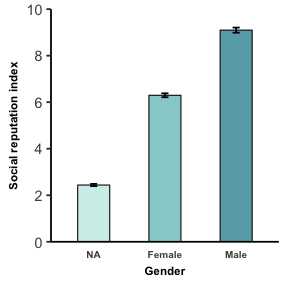

In [20]:
options(repr.plot.width = 2.4, repr.plot.height = 2.4)

data %>%
  # mutate(index = factor(index, levels = c("NA", "Female", "Male"))) %>%
  mutate(gender = factor(gender, levels = c(-1, 0, 1))) %>%
  # ggplot(aes(x=gender, y=coeff, fill=iv)) +
  ggplot(aes(x=gender, y=mean, fill=gender)) +
    geom_bar(position=position_dodge(), stat="identity",
             colour="black", # Use black outlines,
             size=.3, width=.45) +      # Thinner lines
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper),
                  size=.5, width=.1) +
    xlab('Gender') +
    ylab('Social reputation index') +
    # scale_x_discrete(expand=c(0, 0)) +
    scale_x_discrete(labels=c('NA', 'Female', 'Male')) +
    scale_y_continuous(expand = c(0, 0),breaks=seq(0,10,2), labels=seq(0,10,2), limits=c(0,10)) +
    # scale_x_discrete(expand = c(0.5, 0)) +
    scale_fill_manual(values = c("#d1eeea", "#96d0d1", "#68abb8", "#45829b", "#2a5674")) +
    theme_classic() +
    theme(
         legend.position="none",
         # axis.ticks.length = unit(0.1, "cm"),
#          axis.title.x=element_blank(),
#          axis.text.x=element_blank(),
         axis.text.x=element_text(size=6, face="bold"),
        
         axis.title=element_text(size=7, face="bold"),

#          axis.title.y=element_blank(),
#          axis.text.y=element_blank(),

         axis.ticks.x = element_blank(),
        )


---
#### Matching results (PSM)

PSM group: Max vs Other

In [21]:
data <- read.csv('data/PSM-max-other-result.csv')

In [22]:
data

treatment,cnt,mean,ci_lower,ci_upper
<int>,<int>,<dbl>,<dbl>,<dbl>
0,15863,11.98985,11.78884,12.18510
1,15863,14.70465,14.48453,14.92034


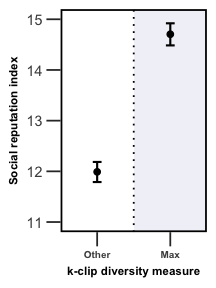

In [23]:
options(repr.plot.width = 1.8, repr.plot.height = 2.4)

data %>%
  mutate(treatment = ifelse(treatment == '0', 1,2)) %>%
  ggplot(aes(x=treatment, y=mean)) +
    geom_rect(aes(xmin=1.5, xmax=Inf, ymin=-Inf, ymax=Inf), fill='#DADAEB', alpha =0.2) +
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper), size=.6, width=.12) +
    geom_point(size=1.5, color='black') +
    scale_x_continuous(expand=c(0, 0), breaks=c(1,2), limits=c(.5, 2.5), labels=c('Other', 'Max')) +
    scale_y_continuous(breaks=seq(1, 15, 1), limits=c(11, 15)) +  #weak, also equivalent to ensmeble
    # scale_y_continuous(breaks=seq(1, 20, 1), limits=c(15, 20)) +  #strong
    # scale_y_continuous(breaks=seq(0, 20, 5), limits=c(5, 20)) +
    xlab('k-clip diversity measure') +
    ylab('Social reputation index') +
    theme_bw() +
    theme(
       legend.position="none",
       plot.background = element_blank(),
       panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(),
       panel.background = element_blank(),

       axis.ticks.length = unit(0.3, "cm"),
       axis.text.x=element_text(size=6, face="bold"),
       axis.title=element_text(size=7, face="bold"),

       panel.border = element_rect(color='black', size=1),
         ) +
    geom_vline(xintercept=1.5, linetype='dotted', colour='black')

---
PSM group: relative social reputation index

In [24]:
data <- read.csv('data/PSM-t2-15-result.csv')

In [25]:
data

mean,se,lower,upper,level,statistic,treatment,pair_cnt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>
1.227775,0.1747597,0.8849791,1.570572,0.05,arithmetic,2,1518
1.370657,0.1730021,1.0313678,1.709946,0.05,arithmetic,3,1946
1.613530,0.1948599,1.2313738,1.995687,0.05,arithmetic,4,1944
2.114136,0.2435291,1.6365030,2.591769,0.05,arithmetic,5,1781
2.498726,0.2628263,1.9832144,3.014237,0.05,arithmetic,6,1637
2.508022,0.3025462,1.9145322,3.101512,0.05,arithmetic,7,1408
3.575119,0.3420076,2.9041555,4.246083,0.05,arithmetic,8,1267
3.387989,0.3884321,2.6258192,4.150160,0.05,arithmetic,9,1077
3.262813,0.3968904,2.4839389,4.041687,0.05,arithmetic,10,960


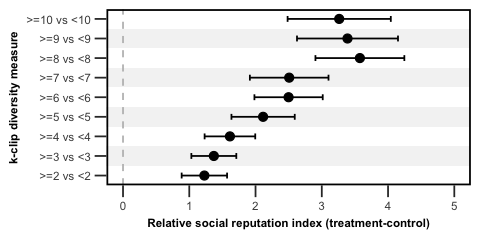

In [26]:
options(repr.plot.width = 4, repr.plot.height = 2)


data %>%
#   mutate(new=paste0(">=", treatment, "vs <", treatment)) %>%
  # mutate(treatment=as.numeric(treatment)) %>%
  ggplot(aes(x=treatment, y=mean)) +
    geom_rect(aes(xmin=1.5, xmax=2.5, ymin=-Inf, ymax=Inf), fill=NA, alpha =0.1) +
    geom_rect(aes(xmin=2.5, xmax=3.5, ymin=-Inf, ymax=Inf), fill='#DADAEB', alpha =0.03) +
    geom_rect(aes(xmin=3.5, xmax=4.5, ymin=-Inf, ymax=Inf), fill=NA, alpha =0.2) +
    geom_rect(aes(xmin=4.5, xmax=5.5, ymin=-Inf, ymax=Inf), fill='#DADAEB', alpha =0.03) +
    geom_rect(aes(xmin=5.5, xmax=6.5, ymin=-Inf, ymax=Inf), fill=NA, alpha =0.2) +
    geom_rect(aes(xmin=6.5, xmax=7.5, ymin=-Inf, ymax=Inf), fill='#DADAEB', alpha =0.03) +
    geom_rect(aes(xmin=7.5, xmax=8.5, ymin=-Inf, ymax=Inf), fill=NA, alpha =0.2) +
    geom_rect(aes(xmin=8.5, xmax=9.5, ymin=-Inf, ymax=Inf), fill='#DADAEB', alpha =0.03) +
    geom_rect(aes(xmin=9.5, xmax=10.5, ymin=-Inf, ymax=Inf), fill=NA, alpha =0.2) +
    # geom_line(linetype='dashed') +
    geom_errorbar(aes(ymin=lower, ymax=upper), size=.5, width=.3) +
    geom_point(size=2.2, color='black') +
    scale_x_continuous(expand=c(0, 0), breaks=seq(2, 15), limits=c(1.5, 10.5), 
                       labels=paste0(">=", seq(2,15), " vs <", seq(2,15))) +
    scale_y_continuous(breaks=seq(0, 15, 1), limits=c(0, 5)) +  #weak, also equivalent to ensmeble
    # scale_y_continuous(breaks=seq(1, 20, 1), limits=c(15, 20)) +  #strong
    # scale_y_continuous(breaks=seq(0, 20, 5), limits=c(5, 20)) +
    xlab('k-clip diversity measure') +
    ylab('Relative social reputation index (treatment-control)') +
    theme_bw() +
    # theme_classic() +
    # theme(legend.position="none") +
    theme(
       legend.position="none",
       plot.background = element_blank(),
       panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(),
       panel.background = element_blank(),

       axis.ticks.length = unit(0.25, "cm"),
       # axis.ticks.y = element_blank(),
       # axis.text.y = element_text(margin=unit(c(0.5,0.5,0.5,0.5), "cm"), color='white'),

       axis.text=element_text(size=7),        
       axis.title=element_text(size=7, face="bold"),

       panel.border = element_rect(color='black', size=1),
         ) +
    geom_hline(yintercept=0, color='grey', size=.5, linetype='dashed') +
    coord_flip()


---
#### Scoial bridges

*social reputation as a function of bridged k-clip diversity measure, stratified by k-clip diversity measure*

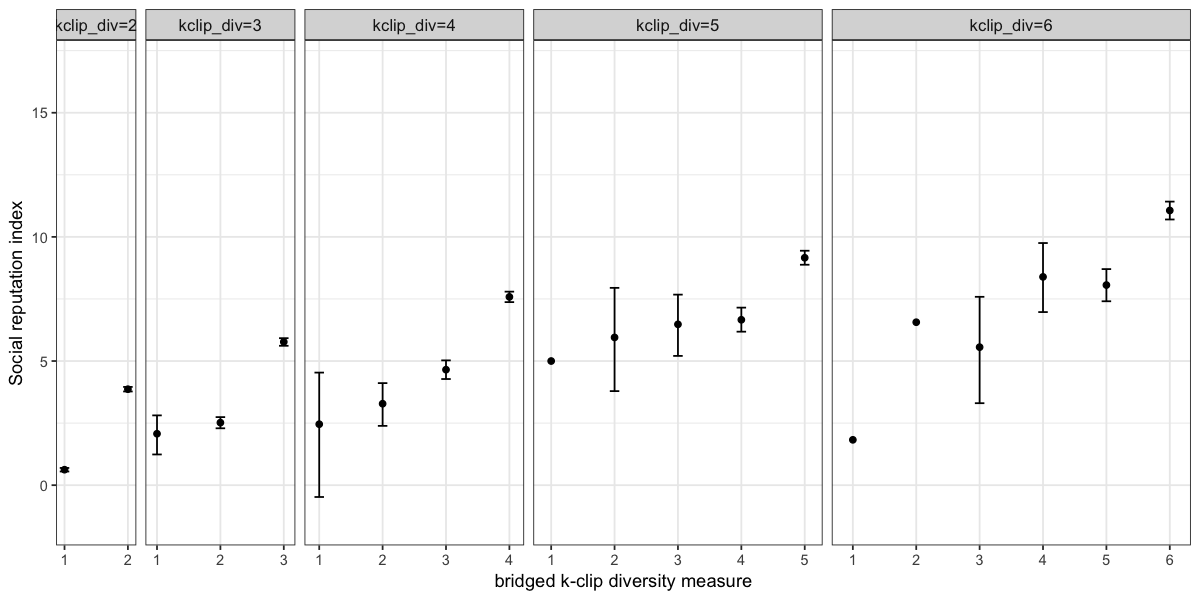

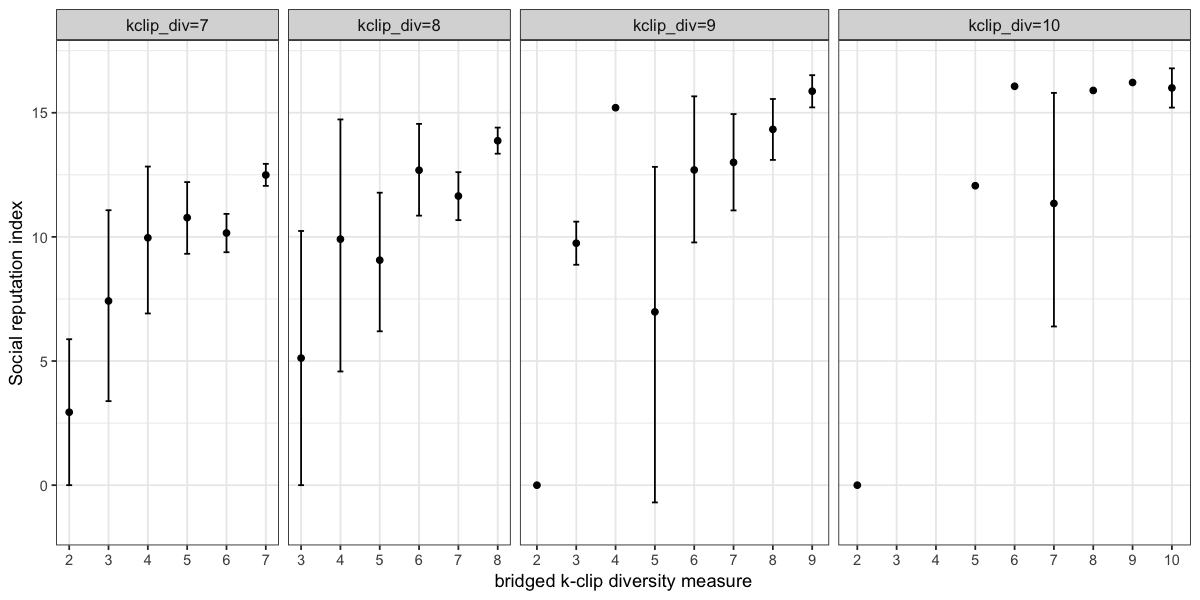

In [27]:
data <- read.csv('data/kclip_bridge_SD.csv')

options(repr.plot.width = 10, repr.plot.height = 5)

levels_ <- c("kclip_div=2", "kclip_div=3", "kclip_div=4", "kclip_div=5", "kclip_div=6")
data %>%
  filter(sd_kclip_5 %in% c(2,3,4,5,6)) %>%
  mutate(group=paste0("kclip_div=", sd_kclip_5)) %>%
  mutate(group=factor(group, levels=levels_)) %>%
  ggplot(aes(x=kclip_5_weak_SB_f20, y=mean)) +
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper), size=0.5, width=.15) +
    geom_point(size=1.5, color='black') +
    scale_x_continuous(breaks=seq(1, 10, 1)) +
    scale_y_continuous(breaks=seq(-5, 20, 5), limits=c(-1.5, 17)) +
    xlab("bridged k-clip diversity measure") + ylab("Social reputation index") +
    facet_grid(cols=vars(group), scales='free_x', space='free_x') +
    theme_bw() +
    theme(panel.grid.minor.x = element_blank(),
         strip.text.x = element_text(size=10), )


options(repr.plot.width = 10, repr.plot.height = 5)

levels_ <- c("kclip_div=7", "kclip_div=8", "kclip_div=9", "kclip_div=10")
data %>%
  filter(sd_kclip_5 %in% c(7,8,9,10)) %>%
  mutate(group=paste0("kclip_div=", sd_kclip_5)) %>%
  mutate(group=factor(group, levels=levels_)) %>%
  ggplot(aes(x=kclip_5_weak_SB_f20, y=mean)) +
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper), size=0.5, width=.15) +
    geom_point(size=1.5, color='black') +
    scale_x_continuous(breaks=seq(1, 10, 1)) +
    scale_y_continuous(breaks=seq(-5, 20, 5), limits=c(-1.5, 17)) +
    xlab("bridged k-clip diversity measure") + ylab("Social reputation index") +
    facet_grid(cols=vars(group), scales='free_x', space='free_x') +
    theme_bw() +
    theme(panel.grid.minor.x = element_blank(),
         strip.text.x = element_text(size=10), )



*advantage of bridged k-clip diversity measure*

In [28]:
data <- read.csv('data/kclip_BSD_regression.csv')

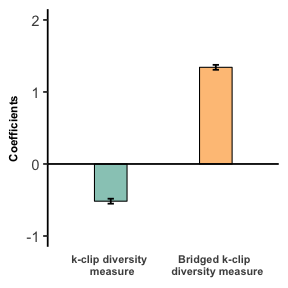

In [29]:
options(repr.plot.width = 2.4, repr.plot.height = 2.4)


data %>%
  filter(!index %in% c('Intercept')) %>%
  filter(ivs %in% c('log_sd_kclip_5+log_kclip_5_weak_SB_f20')) %>%
  mutate(index = factor(index, levels = c("log_sd_kclip_5", 
                        "log_kclip_5_weak_SB_f20"))) %>%
  ggplot(aes(x=index, y=coeff, fill=index)) +
    geom_bar(position=position_dodge(), stat="identity",
             colour="black", # Use black outlines,
             alpha=0.8,
             size=.3, width=.31) +      # Thinner lines
    geom_errorbar(aes(ymin=ci_lower, ymax=ci_upper),
                  size=.5, width=.06,
                  position=position_dodge(.9)) +
    ylab('Coefficients') +
    scale_x_discrete(labels=c( 'k-clip diversity \n measure', 'Bridged k-clip \n diversity measure')) +
    scale_y_continuous(breaks=seq(-2,3,1), limits=c(-1, 2)) +
    scale_fill_manual(values = c('#7bbcb0', '#fdb462')) +
    theme_classic() +
    theme(
         legend.position="none",
         plot.background = element_blank(), 

         axis.ticks.x = element_blank(),
         axis.title.x=element_blank(),
#          axis.text.x=element_blank(),
         axis.text.x=element_text(size=6.5, face="bold"),

         axis.title.y=element_text(size=7, face="bold"),
#          # axis.text.y=element_blank(),

         axis.line.x = element_blank(),
#          axis.line.y = element_line(color="black", size=.7),
         )+
    geom_hline(yintercept=0, size=.5)